## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [2]:
df = pd.read_csv(r"H:\Guvi\Project\Industrial Copper Model\Dataset\Copper_Set.csv")

### Exploratory Data Analysis

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482421628806,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086468611529,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.23559356849678,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.686538384504,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [5]:
df.shape

(181673, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
## checking for distinct values in each column
for i in df.columns:
    print(i, len(df[i].unique()))

id 181672
item_date 253
quantity tons 181673
customer 1170
country 18
status 10
item type 7
application 31
thickness 595
width 1386
material_ref 16564
product_ref 33
delivery date 29
selling_price 9796


In [8]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

id column can be removed as it does not provide anything for the output feature

In [9]:
df.drop(columns='id', axis=1, inplace=True)

In [10]:
## checking categorical feature for distinct value counts 
categorical_columns = []
for i in df.columns:
    if len(df[i].unique())<=33:
        categorical_columns.append(i)
        print(df[i].value_counts())
print(categorical_columns)

country
78.0     32084
26.0     27516
25.0     23362
27.0     21511
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64
status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
application
10.0    77544
41.0    46261
15.0    20772
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       2

As you can see item_date and delivery date are in float so, converting them to datetime format.

In [11]:
df[df.index==1512]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
1512,20210331.0,53.756108,30198577.0,27.0,Won,PL,10.0,1.5,1125.0,BN001603,640665,20210601.0,894.48


In [12]:
## since I got error while running format correction, I did this changes 
df['item_date'] = df['item_date'].replace(19950000.0, 19950101.0)

In [13]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [14]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [15]:
df.tail()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,2020-07-02,102.482421628806,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.0
181669,2020-07-02,208.086468611529,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.0
181670,2020-07-02,4.23559356849678,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.0
181671,2020-07-02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.0
181672,2020-07-02,406.686538384504,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,2020-07-01,607.0


As you can see quantity tons are in float so, converting them to  float format.

In [16]:
## since I got error while running format correction, I did this changes 
df['quantity tons'] = df['quantity tons'].replace('e', np.nan)

In [17]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181671 non-null  datetime64[ns]
 1   quantity tons  181672 non-null  float64       
 2   customer       181672 non-null  float64       
 3   country        181645 non-null  float64       
 4   status         181671 non-null  object        
 5   item type      181673 non-null  object        
 6   application    181649 non-null  float64       
 7   thickness      181672 non-null  float64       
 8   width          181673 non-null  float64       
 9   material_ref   103754 non-null  object        
 10  product_ref    181673 non-null  int64         
 11  delivery date  181670 non-null  datetime64[ns]
 12  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(3)
memory usage: 18.0+ MB


In [19]:
## Checking for null values in each column
df.isna().sum()

item_date            2
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

<Axes: >

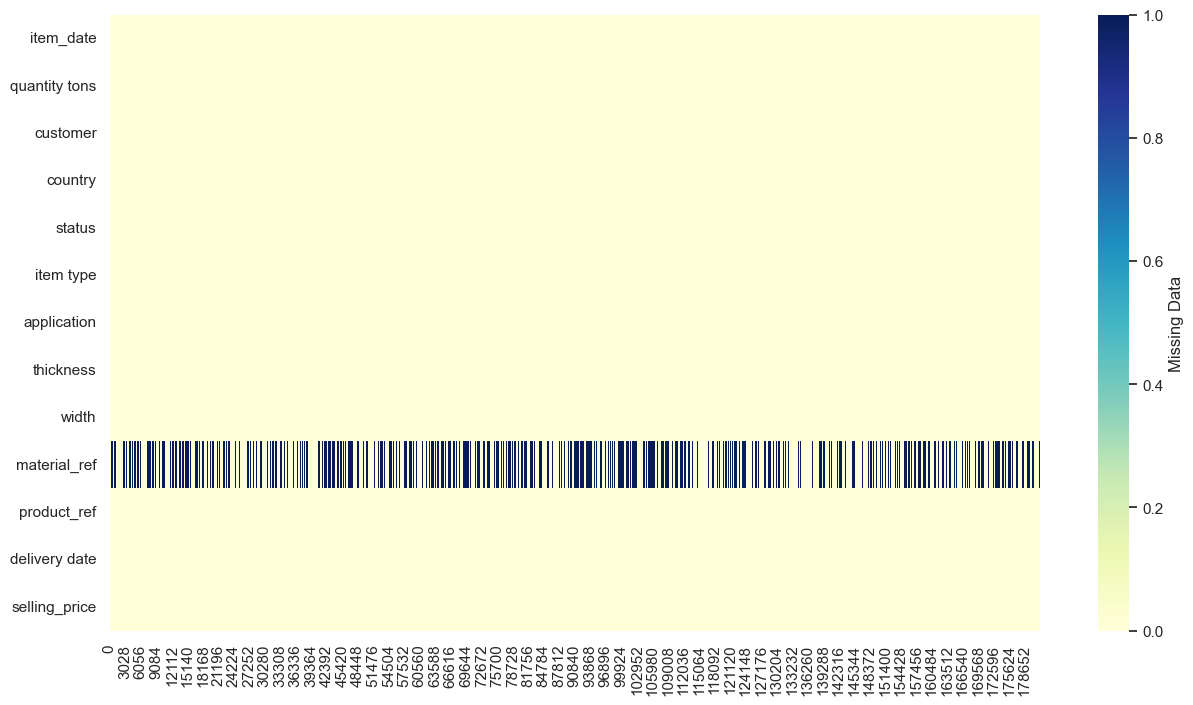

In [20]:
## Visualising null values 
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

In [21]:
## checking for percentage of null values with respect to dataset
df.isnull().mean().sort_values(ascending=True)

item type        0.000000
width            0.000000
product_ref      0.000000
quantity tons    0.000006
customer         0.000006
thickness        0.000006
selling_price    0.000006
item_date        0.000011
status           0.000011
delivery date    0.000017
application      0.000132
country          0.000154
material_ref     0.428897
dtype: float64

As you can see, only material_ref feature has nearly half of missing values.We can use mean, median and mode to fill all the other features except material_ref.

In [22]:
df['item_date'] = df['item_date'].fillna(df['item_date'].mode()[0])
df['quantity tons'] = df['quantity tons'].fillna(df['quantity tons'].median())
df['customer'] = df['customer'].fillna(df['customer'].mode()[0])
df['country'] = df['country'].fillna(df['country'].median())
df['status'] = df['status'].fillna(df['status'].mode()[0])
df['application'] = df['application'].fillna(df['application'].median())
df['thickness'] = df['thickness'].fillna(df['thickness'].median())
df['delivery date'] = df['delivery date'].fillna(df['delivery date'].mode()[0])
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].median())

In [23]:
df['country'].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [24]:
df['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [25]:
df['product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [26]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [27]:
df.tail()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.0
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.0
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.0
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.0
181672,2020-07-02,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,2020-07-01,607.0


In [28]:
## Since some values contains garbage value('0') at the start so removing with left strip technique
df['material_ref'] = df['material_ref'].str.lstrip('0')    

In [29]:
## Used random sampling imputation for filling nan values since data is missing at random and also considering there are many categorical values
def impute_nan_material(df, feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

impute_nan_material(df, 'material_ref')

In [30]:
df.shape

(181673, 13)

<Axes: >

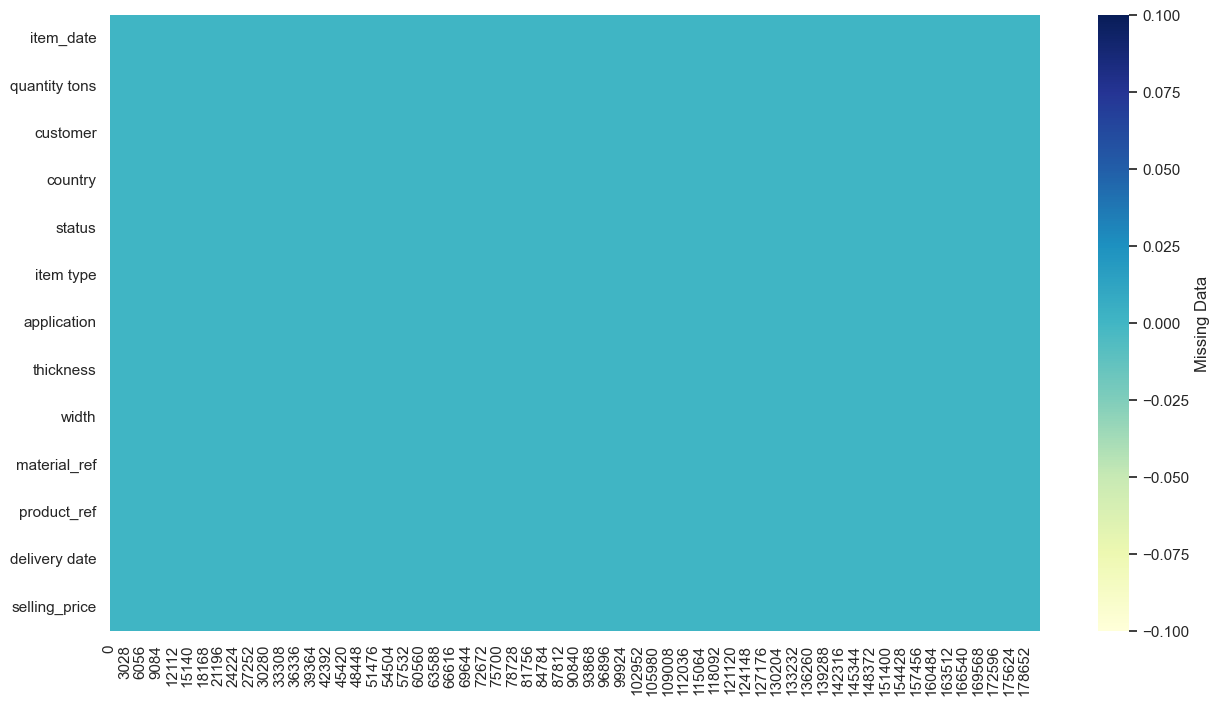

In [31]:
## Checking for null values after imputing null values with mean/median/mode/random sampling
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

In [32]:
## Selecting columns except categorical columns that has albhabetical characters
df_corr = df[['item_date', 'quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'delivery date', 'selling_price']]

In [33]:
## Pearson correlation 
df_pearson_corr = df_corr.corr(method='pearson')
df_pearson_corr

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
item_date,1.000000,-0.004078,-0.003636,-0.008290,-0.007356,0.000558,0.008549,0.043834,0.884989,0.004285
quantity tons,-0.004078,1.000000,-0.000031,-0.001530,-0.001955,-0.000640,-0.000428,-0.001086,-0.002770,-0.000010
customer,-0.003636,-0.000031,1.000000,-0.006669,-0.006869,0.009589,0.009203,-0.007716,-0.002908,-0.000053
country,-0.008290,-0.001530,-0.006669,1.000000,-0.019304,-0.019645,0.055229,-0.147326,-0.092229,0.002993
application,-0.007356,-0.001955,-0.006869,-0.019304,1.000000,-0.059531,-0.204478,-0.131784,-0.078509,0.001462
thickness,0.000558,-0.000640,0.009589,-0.019645,-0.059531,1.000000,0.161713,0.038081,0.014611,-0.001130
width,0.008549,-0.000428,0.009203,0.055229,-0.204478,0.161713,1.000000,-0.034460,0.030007,0.000583
product_ref,0.043834,-0.001086,-0.007716,-0.147326,-0.131784,0.038081,-0.034460,1.000000,0.096195,0.002118
delivery date,0.884989,-0.002770,-0.002908,-0.092229,-0.078509,0.014611,0.030007,0.096195,1.000000,0.001412
selling_price,0.004285,-0.000010,-0.000053,0.002993,0.001462,-0.001130,0.000583,0.002118,0.001412,1.000000


<Axes: >

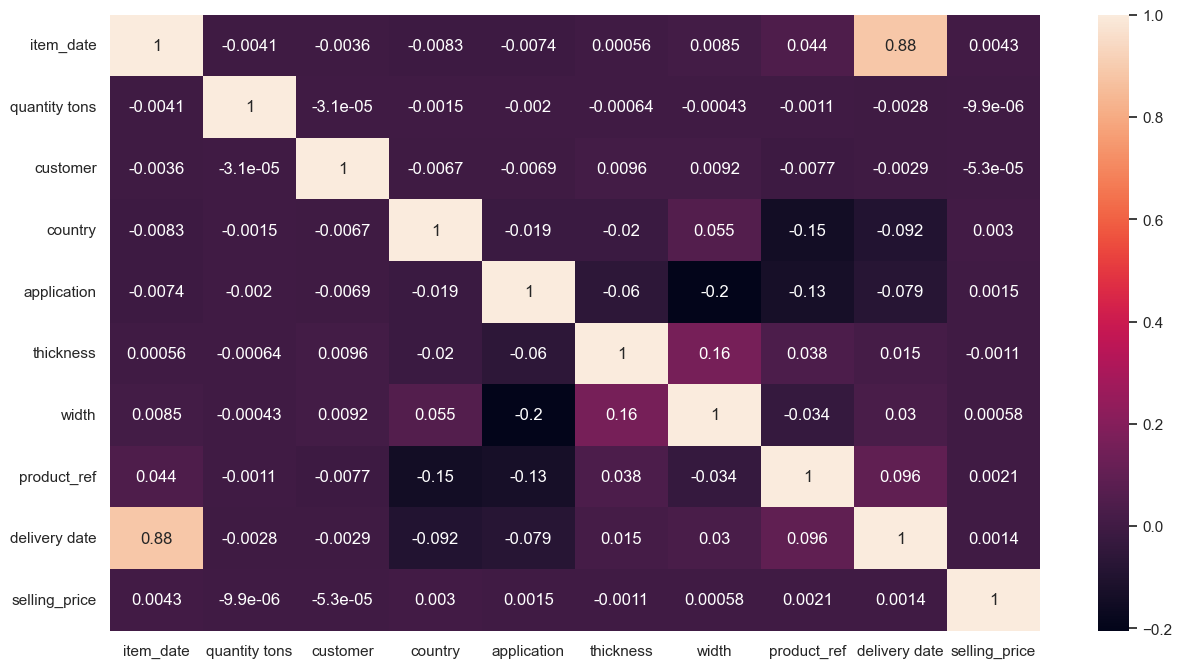

In [34]:
## Visualising pearson correlation 
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(df_pearson_corr, annot=True)

In [35]:
## Spearman correlation 
df_spearman_corr = df_corr.corr(method='spearman')
df_spearman_corr

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
item_date,1.000000,-0.015032,0.006381,-0.008896,-0.015743,0.011447,0.009458,0.020404,0.922686,0.611308
quantity tons,-0.015032,1.000000,0.121349,-0.080209,0.064285,0.037208,0.044815,0.077727,0.019465,-0.043746
customer,0.006381,0.121349,1.000000,0.094980,-0.024664,0.124809,0.078891,0.008401,0.032090,-0.012125
country,-0.008896,-0.080209,0.094980,1.000000,-0.062407,-0.077027,0.029038,-0.099875,-0.073734,-0.008848
application,-0.015743,0.064285,-0.024664,-0.062407,1.000000,-0.190431,-0.173444,-0.217497,-0.074733,0.131595
thickness,0.011447,0.037208,0.124809,-0.077027,-0.190431,1.000000,0.375221,0.503385,0.052598,-0.453901
width,0.009458,0.044815,0.078891,0.029038,-0.173444,0.375221,1.000000,0.125434,0.033359,-0.172152
product_ref,0.020404,0.077727,0.008401,-0.099875,-0.217497,0.503385,0.125434,1.000000,0.070785,-0.307803
delivery date,0.922686,0.019465,0.032090,-0.073734,-0.074733,0.052598,0.033359,0.070785,1.000000,0.591536
selling_price,0.611308,-0.043746,-0.012125,-0.008848,0.131595,-0.453901,-0.172152,-0.307803,0.591536,1.000000


<Axes: >

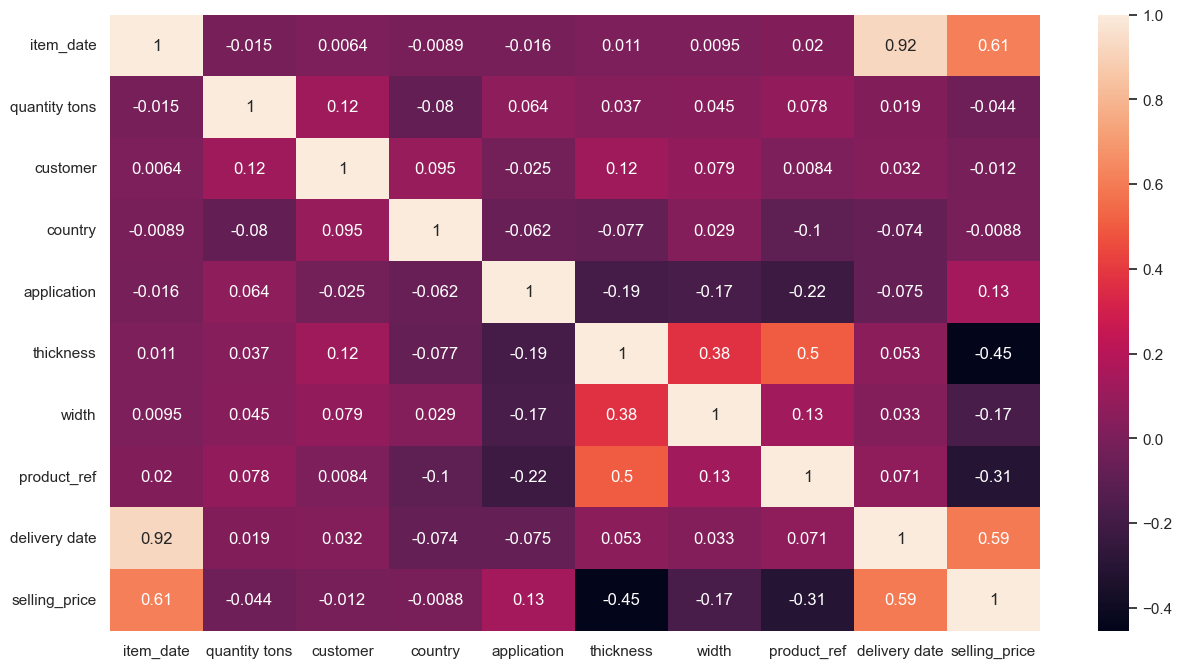

In [36]:
## Visualising spearman correlation 
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(df_spearman_corr, annot=True)

From spearman correlation,  item_date and delivery_date are 92% correlated we can use any one of those features. item_date and selling price(output) are 61% correlated & delivery_date and selling price(output) are 59% correlated. So dropping item_date

In [37]:
df.drop(columns='delivery date', axis=1, inplace=True)

In [38]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00


### Handling outliers for numerical columns

###  quantity tons

Text(0.5, 1.0, 'quantity tons')

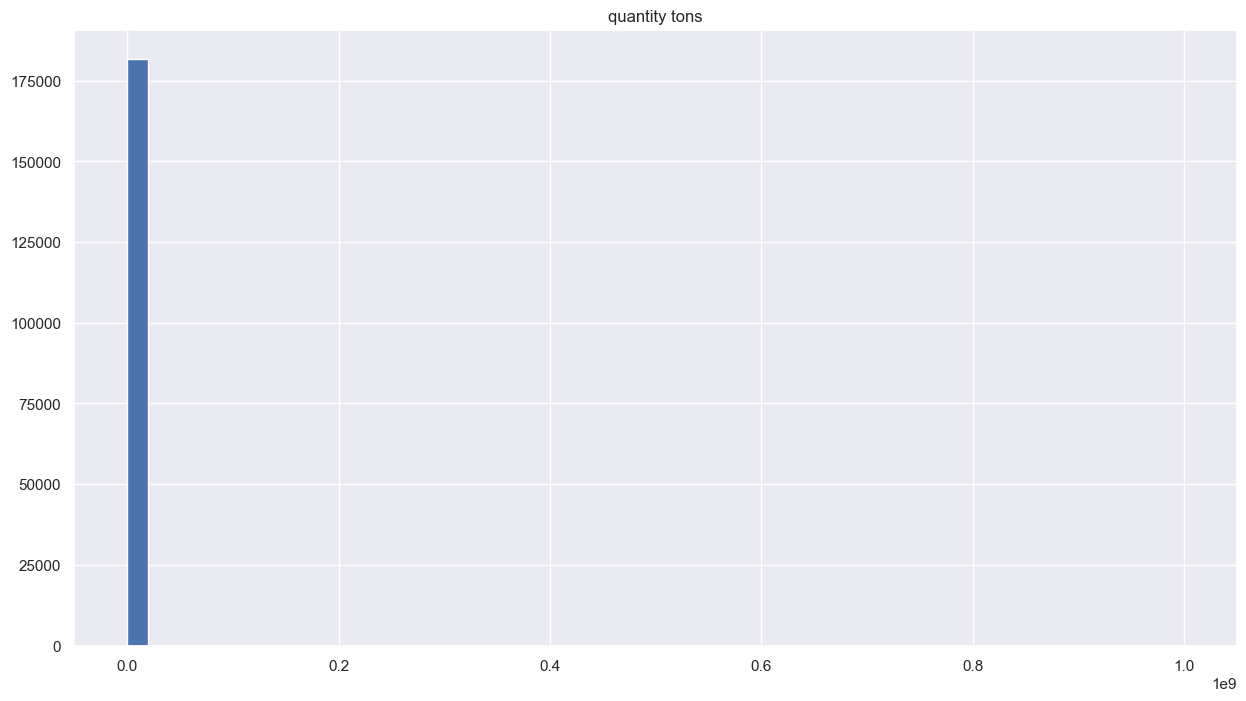

In [39]:
figure = df['quantity tons'].hist(bins=50)
figure.set_title('quantity tons')

<Axes: >

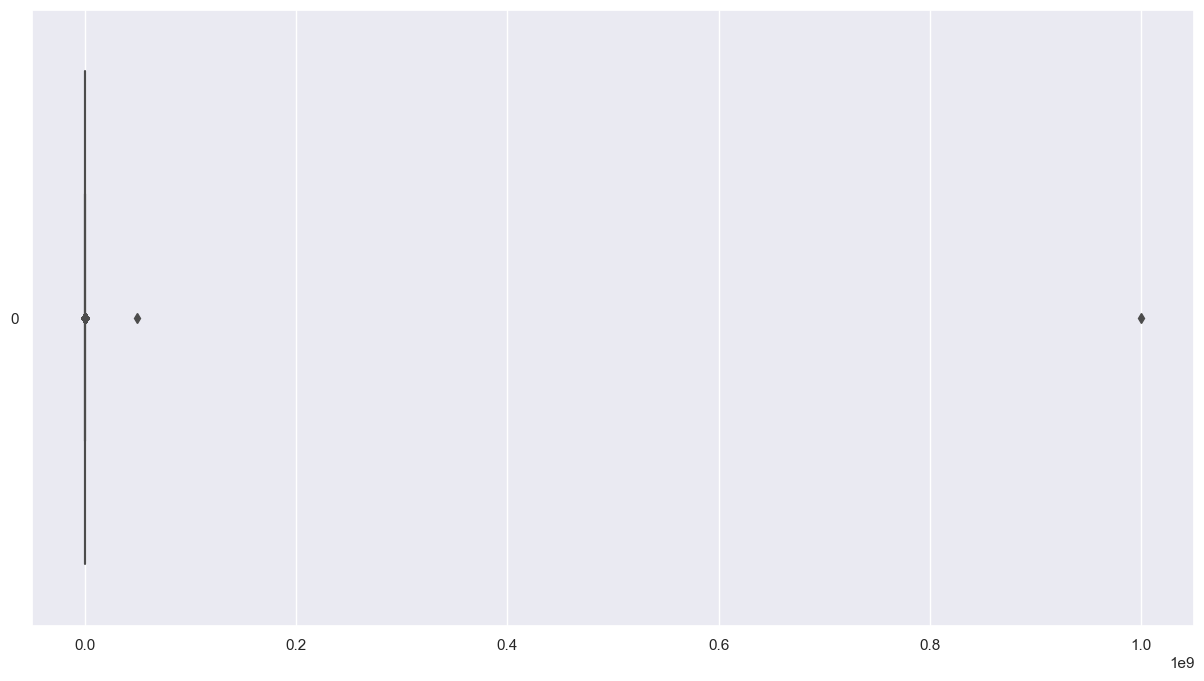

In [40]:
sns.boxplot(df['quantity tons'], orient= 'h')

In [41]:
df['quantity tons'].describe()

count    1.816730e+05
mean     5.874894e+03
std      2.349075e+06
min     -2.000000e+03
25%      1.097037e+01
50%      3.036464e+01
75%      6.716038e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

In [42]:
q1 = df['quantity tons'].quantile(0.25)
print('q1', q1)
q3 = df['quantity tons'].quantile(0.75)
print('q3', q3)
median = df['quantity tons'].median()
print('median', median)
iqr = q3 - q1
print('iqr', iqr)
lower_bound = q1 - 3 * iqr
print('lower_bound', lower_bound)
upper_bound = q3 + 3 * iqr
print('upper_bound', upper_bound)

q1 10.9703737835989
q3 67.1603846825272
median 30.3646354529424
iqr 56.19001089892829
lower_bound -157.599658913186
upper_bound 235.7304173793121


In [43]:
df[df['quantity tons']<=0]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
105730,2020-11-11,-4.000000,30203192.0,27.0,Won,S,15.0,1.50,1500.0,78400840311F60SAG,1332077137,723.0
131473,2020-10-02,-1.476794,30199273.0,27.0,Draft,S,10.0,0.60,1220.0,111598,611993,22.0
181661,2020-07-02,-18.000000,30200854.0,25.0,Won,W,41.0,0.84,1220.0,1000776,164141591,590.0
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,601.0


In [44]:
##since weight cannot be negative but the values seems to be within range so i tried removing minus sign from the values to see how it works.
df['quantity tons'] = np.where(df['quantity tons']<-1000, q1, df['quantity tons'])
df['quantity tons'] = np.where(df['quantity tons']<0,df['quantity tons'].abs() , df['quantity tons'])

In [45]:
df[df['quantity tons']>1.000000e+05]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
173022,2020-07-14,1.000000e+09,30205728.0,30.0,Not lost for AM,S,10.0,0.85,1250.0,DX51D+Z,164141591,583.00
173211,2020-07-14,5.000000e+07,30200964.0,25.0,Not lost for AM,W,41.0,0.88,1245.0,SH S355MC-CAT_A,611993,885.64


In [46]:
df['quantity tons'] = np.where(df['quantity tons']>1.000000e+05,upper_bound , df['quantity tons'])

In [47]:
df['quantity tons'].describe()

count    181673.000000
mean         95.292483
std         434.931978
min           0.000010
25%          10.970669
50%          30.364635
75%          67.160385
max       70252.363068
Name: quantity tons, dtype: float64

Text(0.5, 1.0, 'quantity tons')

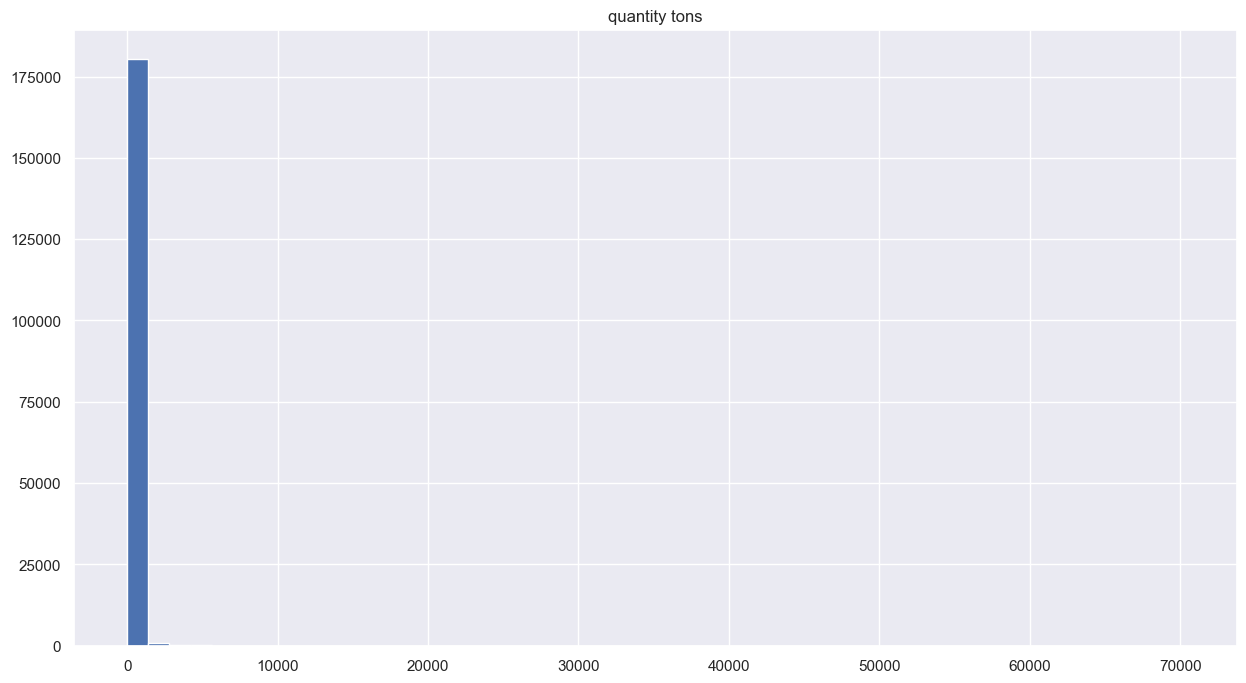

In [48]:
figure = df['quantity tons'].hist(bins=50)
figure.set_title('quantity tons')

<Axes: >

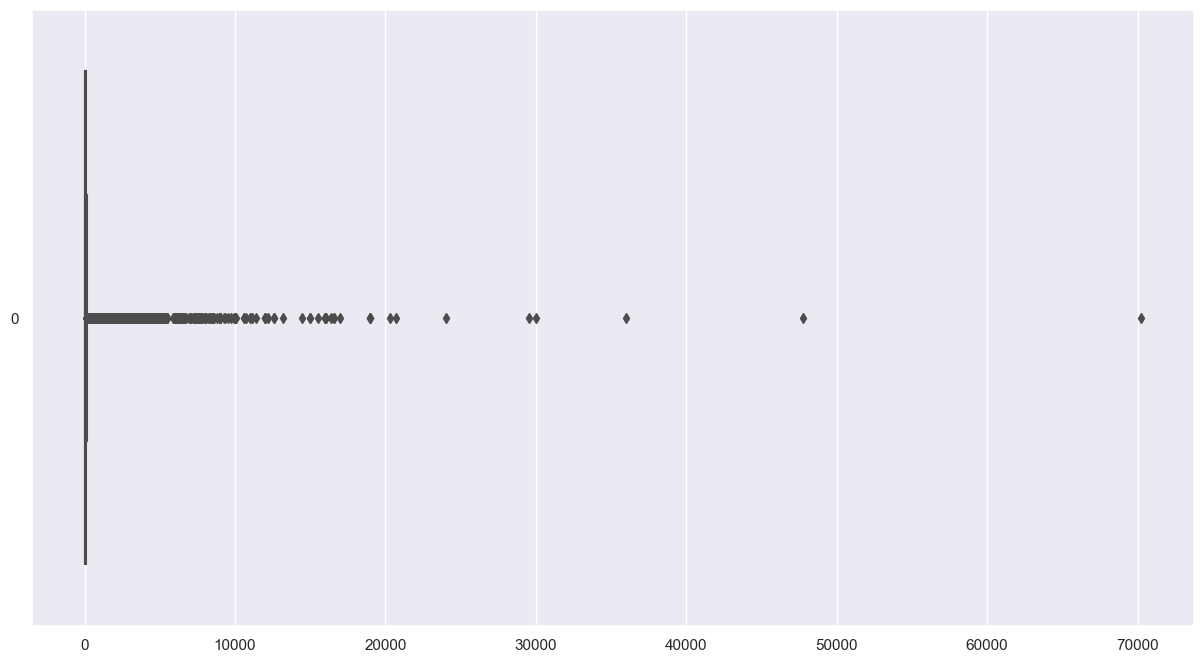

In [49]:
sns.boxplot(df['quantity tons'], orient= 'h')

<Axes: xlabel='quantity tons', ylabel='Density'>

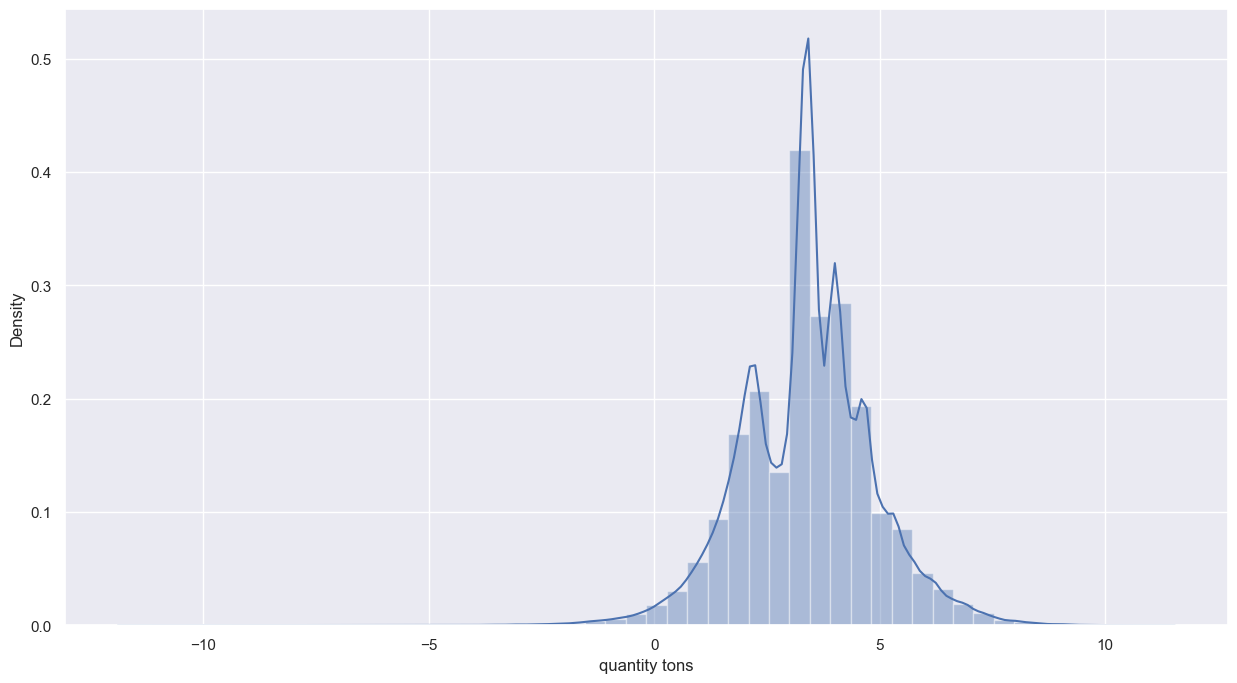

In [50]:
df['quantity tons']  = np.log(df['quantity tons'])
sns.distplot(df['quantity tons'])

### thickness

<Axes: xlabel='thickness', ylabel='Density'>

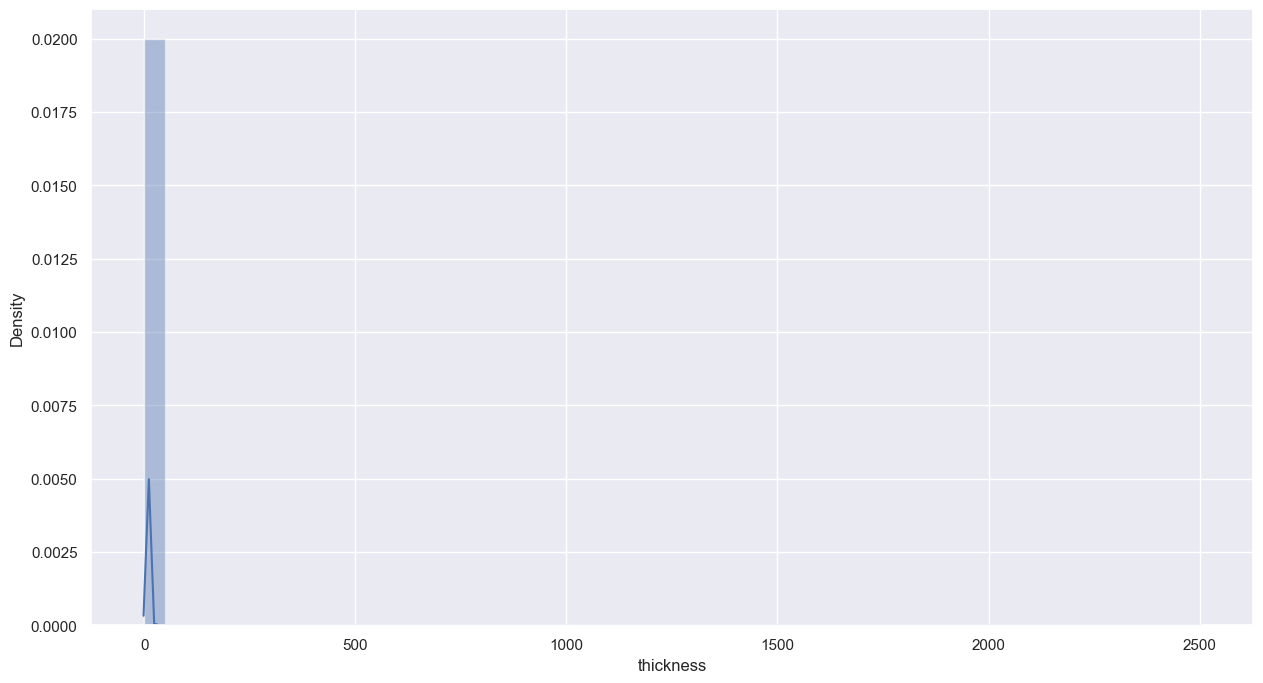

In [51]:
sns.distplot(df['thickness'])

<Axes: >

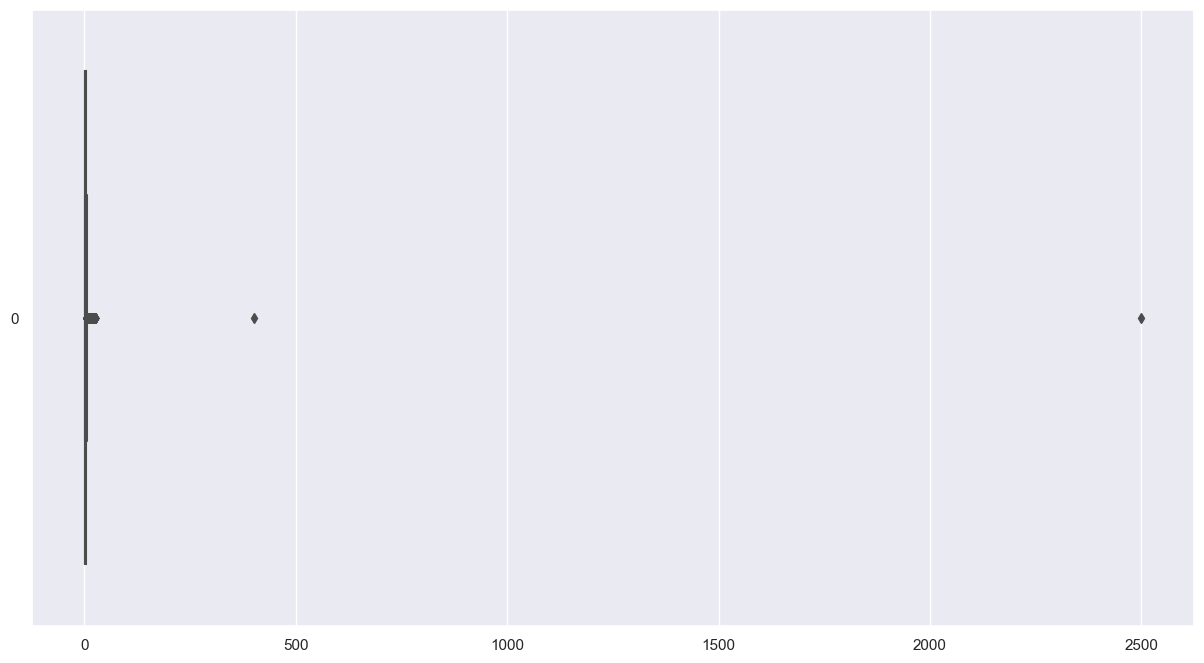

In [52]:
sns.boxplot(df['thickness'], orient='h')

In [53]:
df[df['thickness']<0]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price


In [54]:
df[df['thickness']>250]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
41,2021-04-01,4.092799,30202938.0,25.0,Won,W,41.0,2500.0,1260.0,101952,1670798778,0.0
45001,2021-02-03,3.980967,30201113.0,84.0,Won,S,15.0,400.0,1500.0,GR. 170 / 3.1 / (-),1670798778,878.0


In [55]:
df['thickness'].describe()

count    181673.000000
mean          2.564822
std           6.572303
min           0.180000
25%           0.700000
50%           1.500000
75%           3.000000
max        2500.000000
Name: thickness, dtype: float64

In [56]:
q1 = df['thickness'].quantile(0.25)
print('q1', q1)
q3 = df['thickness'].quantile(0.75)
print('q3', q3)
median = df['thickness'].median()
print('median', median)
iqr = q3 - q1
print('iqr', iqr)
lower_bound = q1 - 3 * iqr
print('lower_bound', lower_bound)
upper_bound = q3 + 3 * iqr
print('upper_bound', upper_bound)

q1 0.7
q3 3.0
median 1.5
iqr 2.3
lower_bound -6.199999999999999
upper_bound 9.899999999999999


In [57]:
df['thickness'] = np.where(df['thickness']>250, upper_bound, df['thickness'])

In [58]:
df['thickness'].describe()

count    181673.000000
mean          2.548968
std           2.827358
min           0.180000
25%           0.700000
50%           1.500000
75%           3.000000
max          25.500000
Name: thickness, dtype: float64

<Axes: xlabel='thickness', ylabel='Density'>

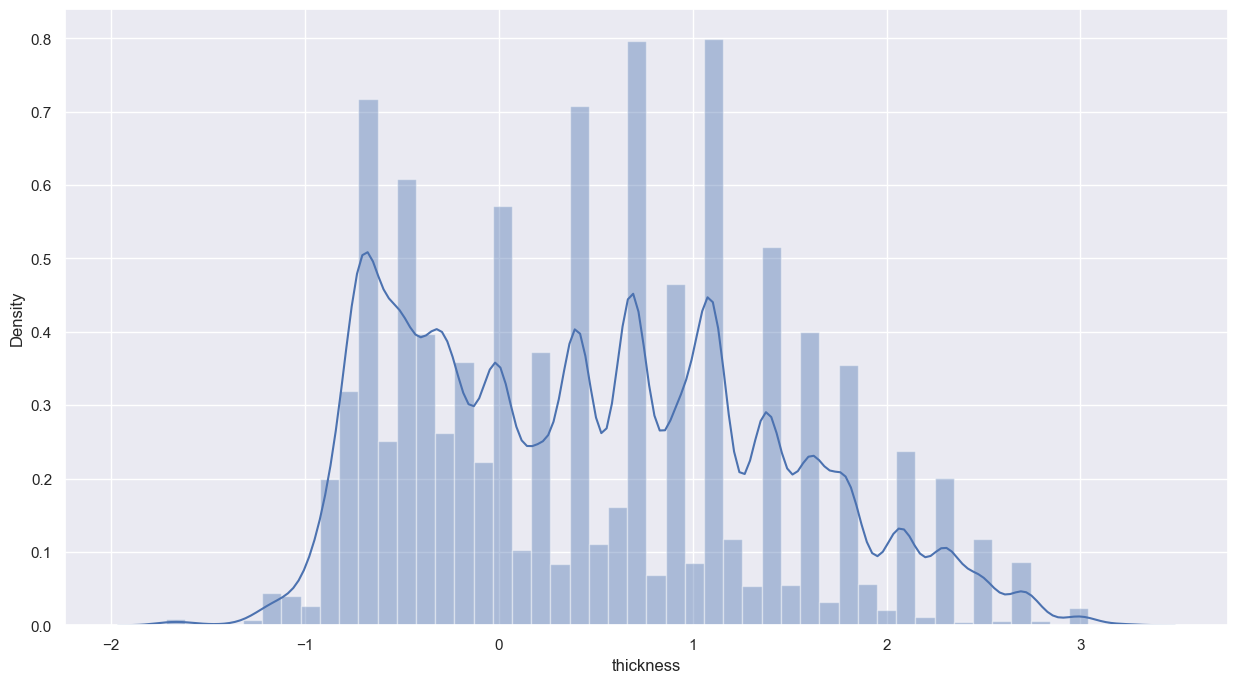

In [59]:
df['thickness'] = np.log(df['thickness'])
sns.distplot(df['thickness'])

### width 

<Axes: xlabel='width', ylabel='Density'>

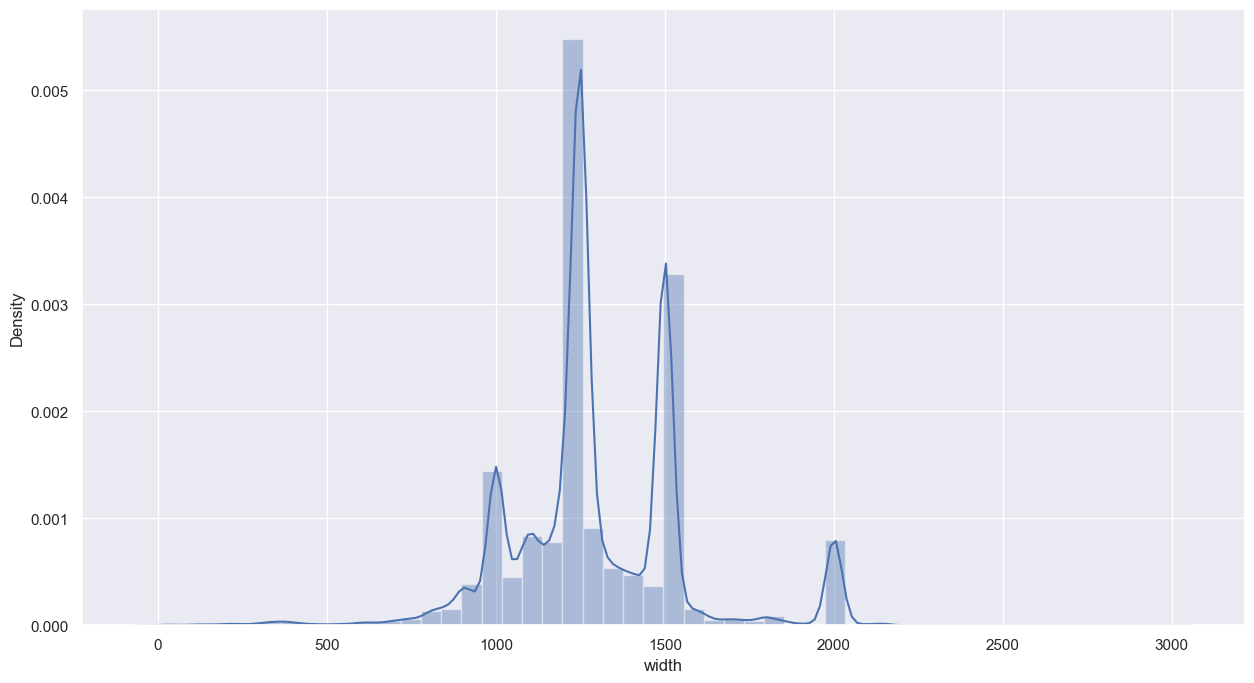

In [60]:
sns.distplot(df['width'])

<Axes: >

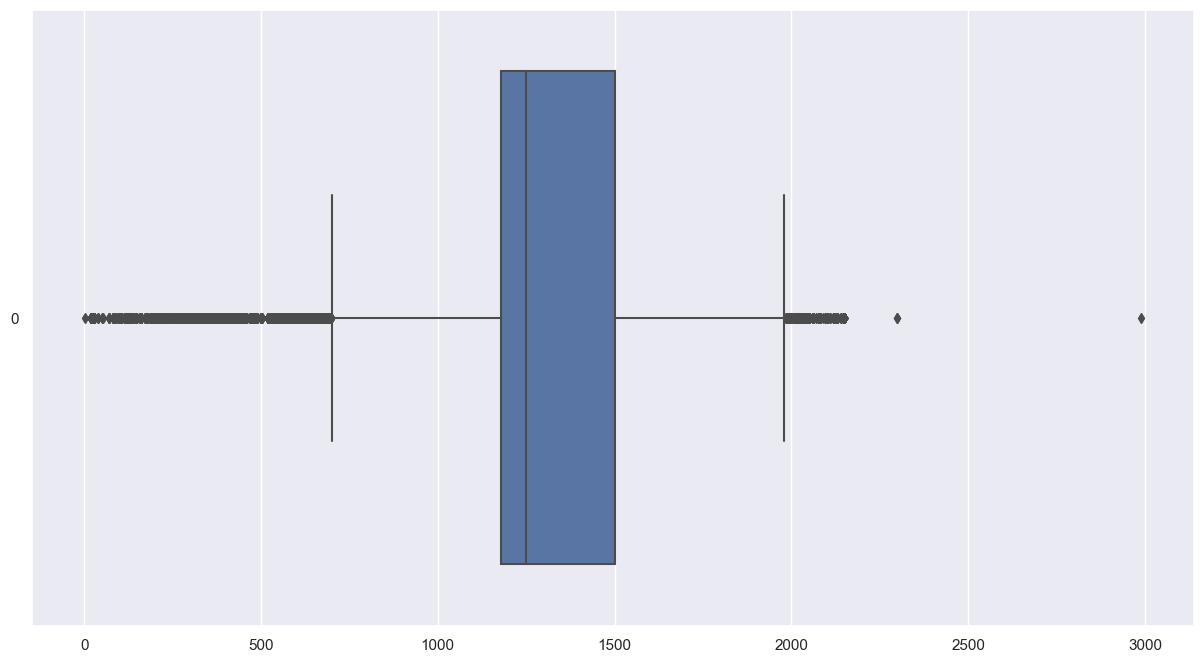

In [61]:
sns.boxplot(df['width'], orient='h')

In [62]:
df['width'].describe()

count    181673.000000
mean       1295.286724
std         261.631754
min           1.000000
25%        1180.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

In [63]:
upper_bound_width = df['width'].mean() + 3*df['width'].std()
lower_bound_width = df['width'].mean() - 3*df['width'].std()
print('upper_bound_width', upper_bound_width)
print('lower_bound_width', lower_bound_width)

upper_bound_width 2080.181985958154
lower_bound_width 510.3914616097286


### selling_price

<Axes: xlabel='selling_price', ylabel='Density'>

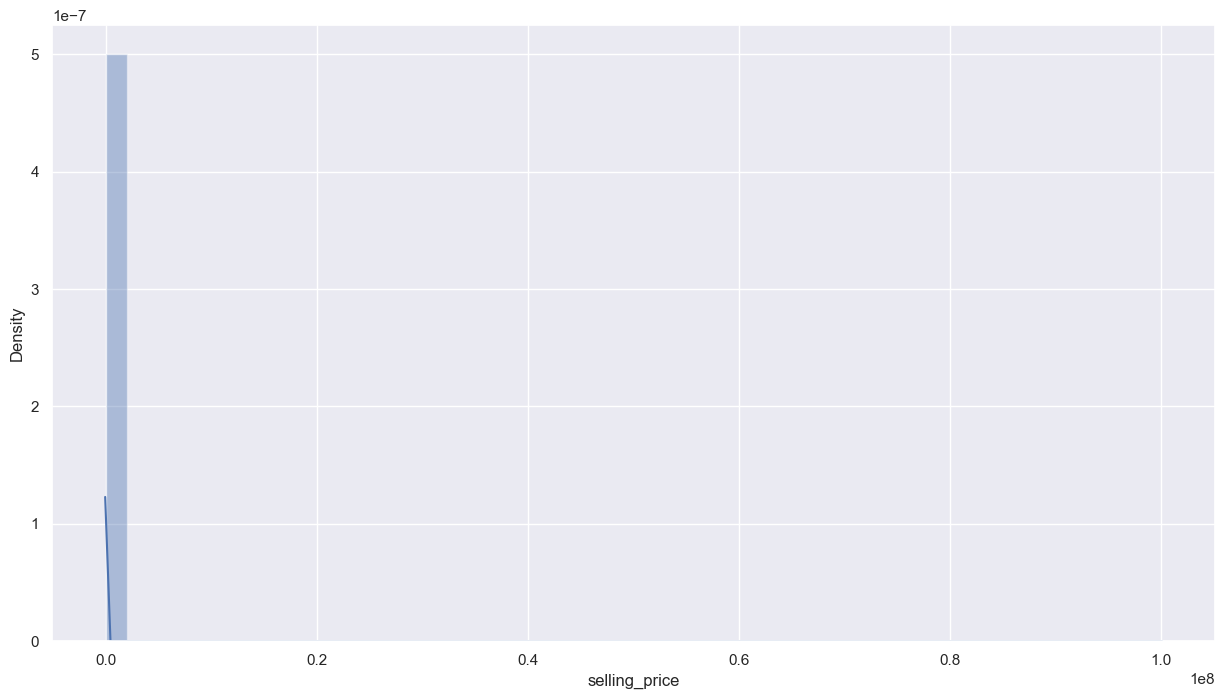

In [64]:
sns.distplot(df['selling_price'])

<Axes: >

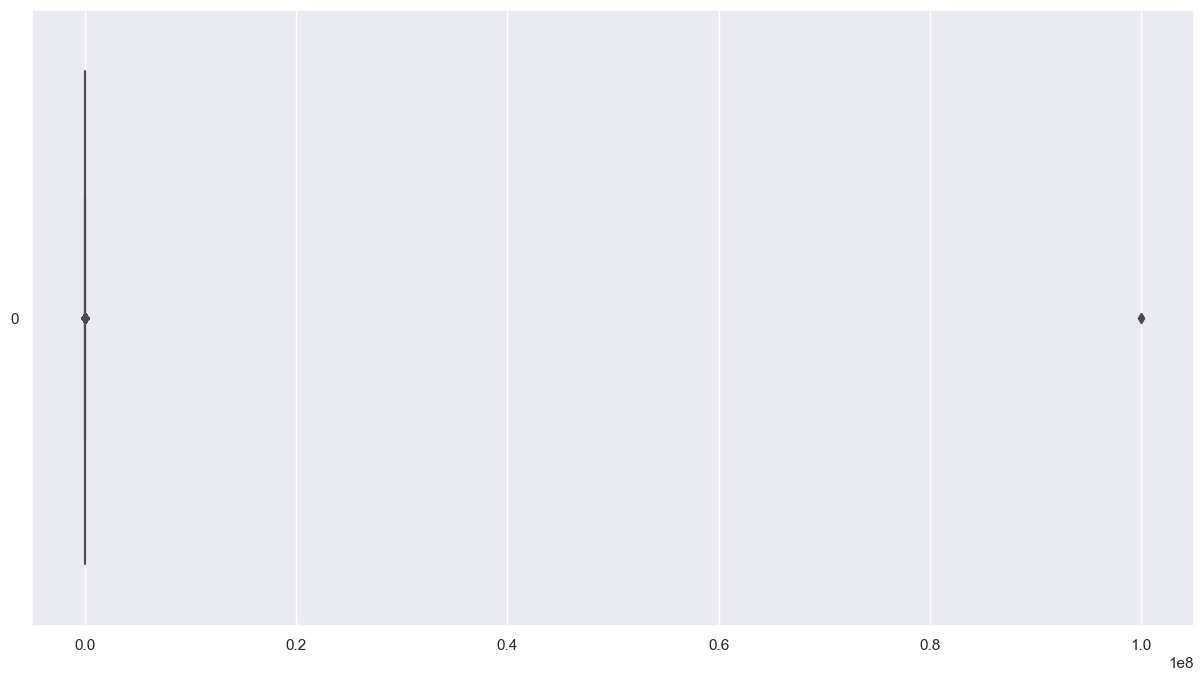

In [65]:
sns.boxplot(df['selling_price'], orient='h')

In [66]:
df['selling_price'].describe()

count    1.816730e+05
mean     1.918029e+03
std      3.317947e+05
min     -1.160000e+03
25%      6.690000e+02
50%      8.120000e+02
75%      9.530000e+02
max      1.000010e+08
Name: selling_price, dtype: float64

In [67]:
q1 = df['selling_price'].quantile(0.25)
print('q1', q1)
q3 = df['selling_price'].quantile(0.75)
print('q3', q3)
median = df['selling_price'].median()
print('median', median)
iqr = q3 - q1
print('iqr', iqr)
lower_bound = q1 - 3 * iqr
print('lower_bound', lower_bound)
upper_bound = q3 + 3 * iqr
print('upper_bound', upper_bound)

q1 669.0
q3 953.0
median 812.0
iqr 284.0
lower_bound -183.0
upper_bound 1805.0


In [68]:
df[df['selling_price']>1e4]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
10228,2021-03-18,3.779777,30353306.0,107.0,To be approved,S,56.0,-0.916291,1254.0,S235JR+AR LARG SUP 1500 CVLT,1721130331,1.000009e+08
36192,2021-02-19,2.160653,30217607.0,27.0,Not lost for AM,PL,10.0,-0.510826,1446.0,95932,164141591,1.000010e+08
123570,2020-10-14,0.583602,30229766.0,84.0,Won,W,41.0,-0.693147,1250.0,SUB6.G1015 GRANITE STD,611993,8.123614e+04
124547,2020-10-13,2.252293,30205658.0,32.0,Won,W,10.0,-0.287682,1000.0,401002001250,611993,1.091300e+04


In [69]:
df['selling_price'] = np.where(df['selling_price']<=0, q1, df['selling_price'])

In [70]:
df['selling_price'] = np.where(df['selling_price']>1e4, upper_bound, df['selling_price'])

<Axes: xlabel='selling_price', ylabel='Density'>

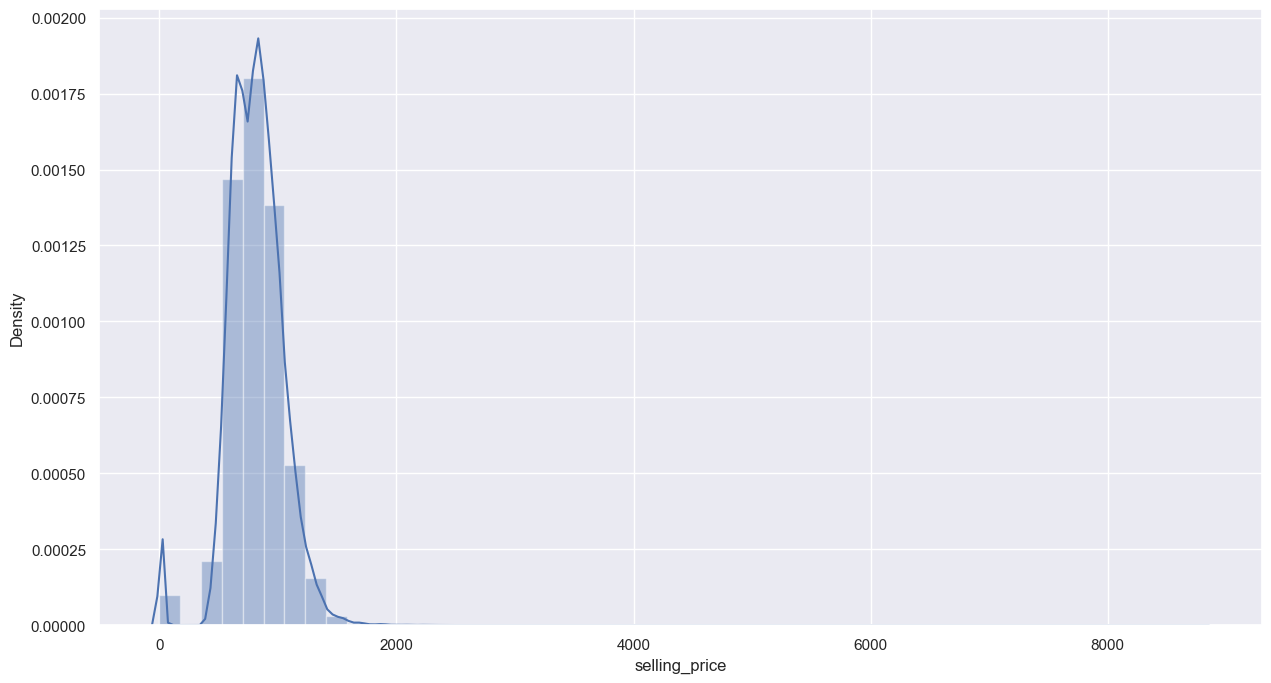

In [71]:
sns.distplot(df['selling_price'])

<Axes: xlabel='selling_price', ylabel='Density'>

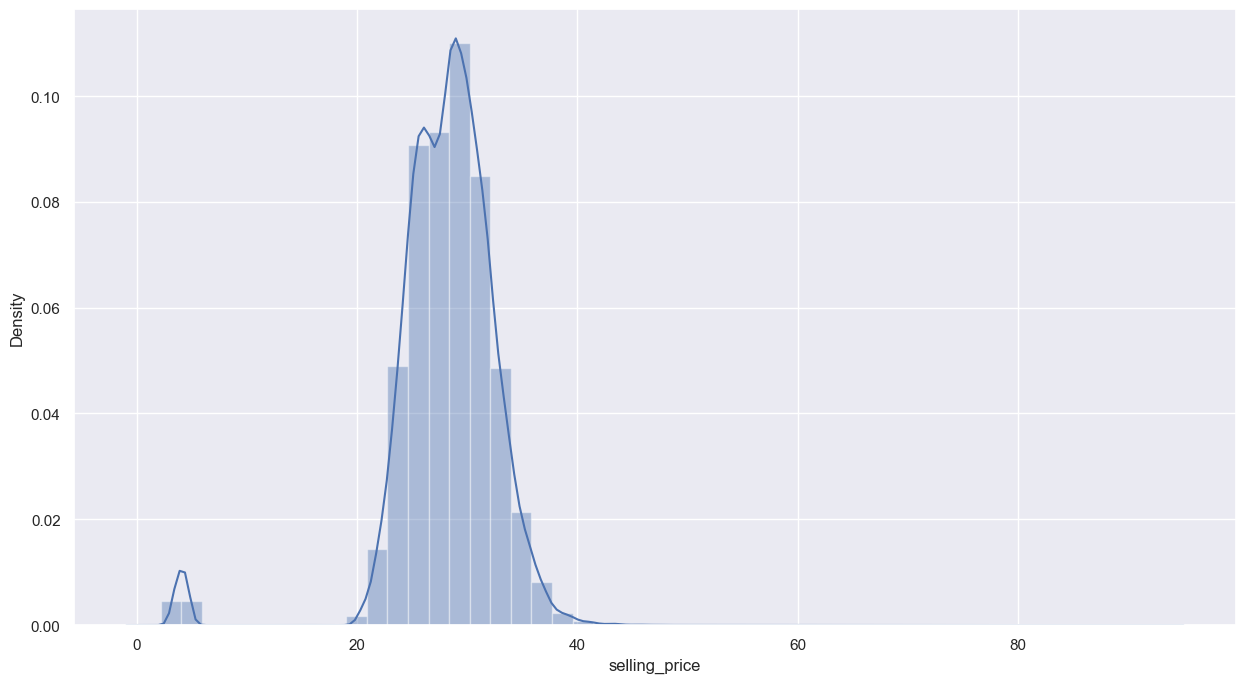

In [72]:
df['selling_price'] = (df['selling_price'])**(1/2)
sns.distplot(df['selling_price'])

In [73]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,29.223278
1,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,32.357379
2,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,25.383656
3,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,27.712813
4,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,24.020824


In [74]:
df['selling_price'].median()

28.495613697550013

### Encoding categorical features

In [75]:
## frequency or count encoding is done for status, item type, material_ref
for feature in ['status', 'item type', 'material_ref']:
    feature_map = df[feature].value_counts().to_dict()
    df[feature] = df[feature].map(feature_map)
    print(feature_map)

{'Won': 116012, 'Lost': 34438, 'Not lost for AM': 19573, 'Revised': 4276, 'To be approved': 4170, 'Draft': 3140, 'Offered': 53, 'Offerable': 10, 'Wonderful': 1}
{'W': 105615, 'S': 69236, 'PL': 5660, 'Others': 610, 'WI': 524, 'IPL': 27, 'SLAWR': 1}
{'DX51D+Z': 1614, 'G9010': 1486, 'DC01 RED.FLAT KUCHNIA EKO 2.2': 1387, 'DC01': 1260, 'G9006': 1175, 'G9002': 1096, 'G7016': 854, 'S235JR+AR-CL1': 730, 'K DX51D+Z PROFILES': 720, 'DX51D+Z275 EKO 2.2': 674, 'NEQ1 S355J2+N': 660, 'A9010': 613, 'CLS05S700MC/000094': 563, 'S220GD+Z': 527, 'S235JR+N-CL1': 517, 'DES1 DD11-CL1AMFCE': 511, 'S355MC-CAT_A 3.1': 490, 'typical item': 461, 'DX51D+Z275': 439, 'DC01-CAT_A': 402, 'DX51D+Z_A': 330, 'S355J2+N-CL1': 322, 'S220GD+Z275 MAC_GALV EDGES': 321, 'S235JR+AR_CL1': 321, 'PI_S235JR-CL1': 316, 'S350GD+ZM': 307, 'CONSIGNMENT STOCK': 274, 'DC04': 273, 'G7035': 255, 'BOB': 250, 'DC01+ZV25/25': 246, 'typical basket': 244, 'DX51D+ZM': 242, '81420726363F35CSA': 241, 'S235JR+AR LARG SUP 1500 CVLT': 239, 'HC220CA'

In [76]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,116012,105615,10.0,0.693147,1500.0,14,1670798778,29.223278
1,2021-04-01,6.643822,30202938.0,25.0,116012,105615,41.0,-0.223144,1210.0,7,1668701718,32.357379
2,2021-04-01,5.956169,30153963.0,30.0,116012,524,28.0,-0.967584,952.0,3,628377,25.383656
3,2021-04-01,5.310301,30349574.0,32.0,116012,69236,59.0,0.832909,1317.0,15,1668701718,27.712813
4,2021-04-01,6.666354,30211560.0,28.0,116012,105615,10.0,1.386294,2000.0,39,640665,24.020824


In [77]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,116012,105615,10.0,0.693147,1500.0,14,1670798778,29.223278
1,2021-04-01,6.643822,30202938.0,25.0,116012,105615,41.0,-0.223144,1210.0,7,1668701718,32.357379
2,2021-04-01,5.956169,30153963.0,30.0,116012,524,28.0,-0.967584,952.0,3,628377,25.383656
3,2021-04-01,5.310301,30349574.0,32.0,116012,69236,59.0,0.832909,1317.0,15,1668701718,27.712813
4,2021-04-01,6.666354,30211560.0,28.0,116012,105615,10.0,1.386294,2000.0,39,640665,24.020824


In [78]:
df['item_date'] = df['item_date'].astype(str)

In [79]:
df['item_delivery_year'] = df['item_date'].apply(lambda x : x.split('-')[0])
df['item_delivery_month'] = df['item_date'].apply(lambda x : x.split('-')[1])
df['item_delivery_date'] = df['item_date'].apply(lambda x : x.split('-')[2])

In [80]:
df.drop(columns='item_date', axis=1,inplace=True)

In [81]:
df['item_delivery_year'] = df['item_delivery_year'].astype(int)
df['item_delivery_month'] = df['item_delivery_month'].astype(int)
df['item_delivery_date'] = df['item_delivery_date'].astype(int)

In [82]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_delivery_year,item_delivery_month,item_delivery_date
0,3.991779,30156308.0,28.0,116012,105615,10.0,0.693147,1500.0,14,1670798778,29.223278,2021,4,1
1,6.643822,30202938.0,25.0,116012,105615,41.0,-0.223144,1210.0,7,1668701718,32.357379,2021,4,1
2,5.956169,30153963.0,30.0,116012,524,28.0,-0.967584,952.0,3,628377,25.383656,2021,4,1
3,5.310301,30349574.0,32.0,116012,69236,59.0,0.832909,1317.0,15,1668701718,27.712813,2021,4,1
4,6.666354,30211560.0,28.0,116012,105615,10.0,1.386294,2000.0,39,640665,24.020824,2021,4,1


In [83]:
df['status'].unique()

array([116012,   3140,   4170,  34438,  19573,      1,   4276,     53,
           10], dtype=int64)

In [84]:
df['item_delivery_date'].unique()

array([ 1, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 19, 18, 17, 16, 15, 14,
       13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2, 21, 20])

since delivery date contains only one value , dropping delivery_date column

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   quantity tons        181673 non-null  float64
 1   customer             181673 non-null  float64
 2   country              181673 non-null  float64
 3   status               181673 non-null  int64  
 4   item type            181673 non-null  int64  
 5   application          181673 non-null  float64
 6   thickness            181673 non-null  float64
 7   width                181673 non-null  float64
 8   material_ref         181673 non-null  int64  
 9   product_ref          181673 non-null  int64  
 10  selling_price        181673 non-null  float64
 11  item_delivery_year   181673 non-null  int32  
 12  item_delivery_month  181673 non-null  int32  
 13  item_delivery_date   181673 non-null  int32  
dtypes: float64(7), int32(3), int64(4)
memory usage: 17.3 MB


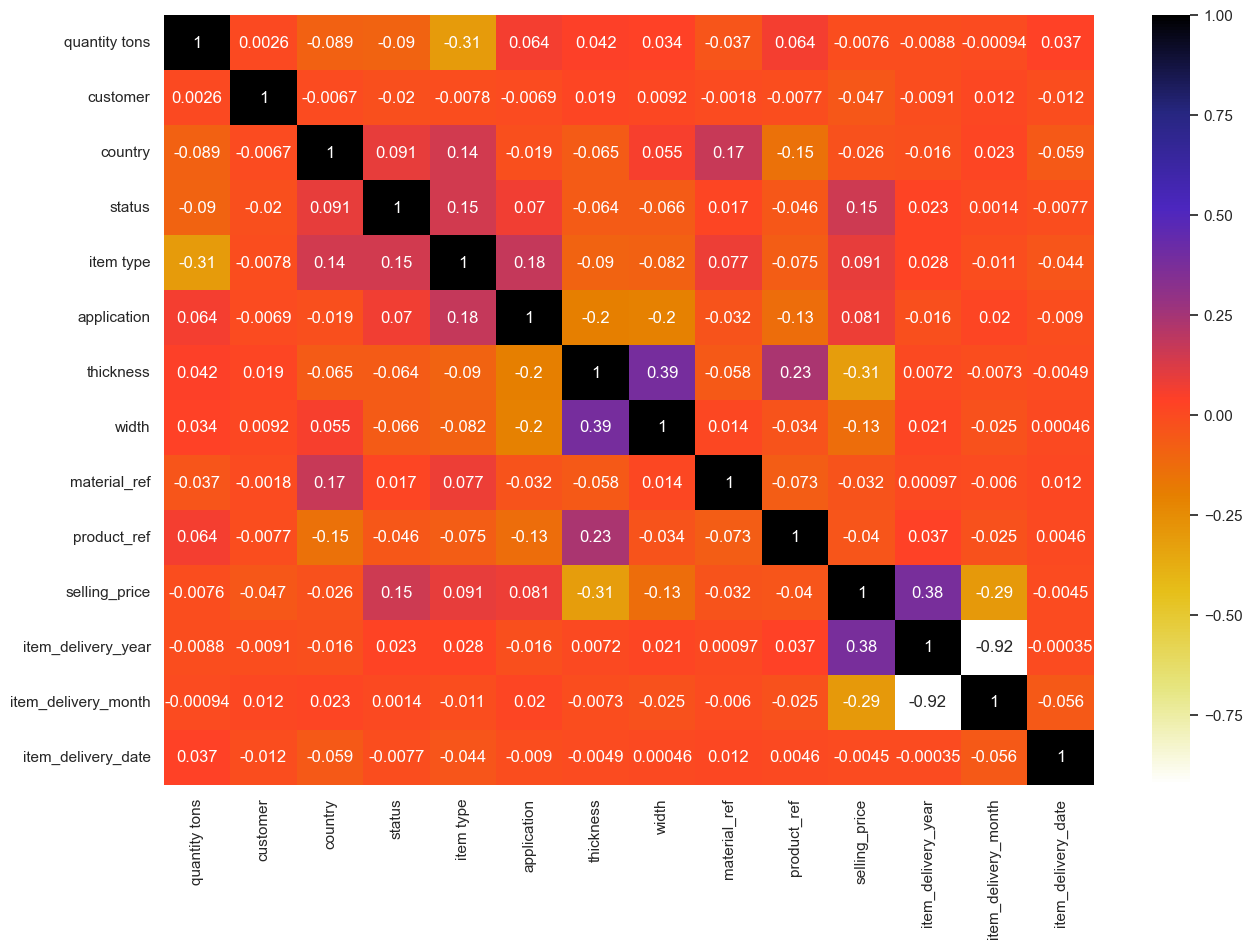

In [86]:
plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Feature importance

In [87]:
## Assigning features into input(X) and ouput(y)
X = df.drop(labels=['selling_price'], axis=1)
y = df['selling_price']

In [88]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [89]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(15)

status                 0.457255
item_delivery_month    0.153454
thickness              0.125772
product_ref            0.058653
item_delivery_year     0.051846
country                0.028078
application            0.026764
customer               0.021382
item_delivery_date     0.019889
quantity tons          0.018058
item type              0.017875
width                  0.010905
material_ref           0.010068
dtype: float64

From above feature selection technique we come to know material_ref is not that much important we can drop that feature

In [90]:
df.drop(columns='material_ref', axis=1, inplace=True)

In [91]:
df.to_csv(r"H:\Guvi\Project\Industrial Copper Model\Dataset\regression and classification\regression_copper.csv", index=False)

### Model Training and Evaluation 

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [93]:
## Splitting dataset for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Started with linear regression to see how it performs

In [90]:
## Scaling down all the features into similar scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
## Creating regression object for linear regression
regression = LinearRegression()

In [93]:
## Fitting the model into x_train and y_train
regression.fit(X_train,y_train)

LinearRegression()

In [94]:
X_test = scaler.transform(X_test)

In [95]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [96]:
score=r2_score(y_test,y_pred)
print(score)

0.31118436253332815


In [97]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

15.369120618514923
2.1064118787465014
3.9203470023092244


R2 score is very much low for linear regression so tried decision which I thought might perform well

In [144]:
dt_regressor = DecisionTreeRegressor()

In [145]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [146]:
y_pred = dt_regressor.predict(X_test)

In [147]:
score_dt=r2_score(y_test,y_pred)
print(score_dt)

0.9396178574752541


In [148]:
mse_dt = mean_squared_error(y_test,y_pred)
mae_dt = mean_absolute_error(y_test,y_pred)
rmse_dt = np.sqrt(mse_dt)
print(mse_dt)
print(mae_dt)
print(rmse_dt)

1.347269691902258
0.5404586131061556
1.160719471664992


Decision tree does give me very good r2 score so tried hyperparameter tuning to see if I can improve perormance of the model

### Hyperparameter tuning

### RandomSearch CV

In [94]:
dt_params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter' : ['best', 'random'],
             'max_depth' : [1,2,3,4,5,10,15,20,25],
             'max_features' : ['auto','sqrt','log2'],
             'min_samples_split' : [2, 8, 15, 20, 30, 50, 100],
             'random_state' : [0, 2, 4, 8, 25, 50, 100]}

In [95]:
random = RandomizedSearchCV(estimator=dt_regressor, param_distributions=dt_params, n_iter=100, cv=3, verbose=2, n_jobs=-1)

In [96]:
random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 10, 15, 20,
                                                      25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 8, 15, 20, 30,
                                                              50, 100],
                                        'random_state': [0, 2, 4, 8, 25, 50,
                                                         100],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [98]:
random.best_params_

{'splitter': 'best',
 'random_state': 2,
 'min_samples_split': 50,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'poisson'}

### Gridsearch CV

In [108]:
regressor1 = DecisionTreeRegressor(criterion = 'poisson', splitter = 'best', max_features = 'auto')

In [109]:
params = {'max_depth' : [10, 15, 20, 25, 30],
          'min_samples_split' : [20, 30, 50, 75],
          'random_state' : [0, 2, 4, 6]}

In [110]:
grid=GridSearchCV(estimator=regressor1,param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='poisson',
                                             max_features='auto'),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_split': [20, 30, 50, 75],
                         'random_state': [0, 2, 4, 6]},
             scoring='neg_mean_squared_error')

In [111]:
grid.best_params_

{'max_depth': 30, 'min_samples_split': 30, 'random_state': 2}

In [112]:
y_pred = grid.predict(X_test)

In [ ]:
grid_score=r2_score(y_test,y_pred)
print(grid_score)

In [114]:
dt_best_model = DecisionTreeRegressor(criterion = 'poisson', splitter = 'best', max_features = 'auto', max_depth = 30, 
                                   min_samples_split = 30,random_state = 2)

In [115]:
dt_best_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=30, max_features='auto',
                      min_samples_split=30, random_state=2)

In [116]:
score2=r2_score(y_test,y_pred)
print(score2)

0.9498286456099514


In [117]:
mse2=mean_squared_error(y_test,y_pred)
mae2=mean_absolute_error(y_test,y_pred)
rmse2=np.sqrt(mse2)
print(mse2)
print(mae2)
print(rmse2)

1.1194426422298303
0.5690219954033235
1.0580371648622888


Hyperparameter tuning did improve the model performance but I came to know about lazypredict library which checks for all the possible models and gives out the performance score

In [97]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

X, y = shuffle(df.drop(labels=['selling_price'], axis=1), df['selling_price'], random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 98%|█████████████████████████████████████████████████████████████████████████████  | 41/42 [2:00:13<05:08, 308.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1504
[LightGBM] [Info] Number of data points in the train set: 163505, number of used features: 13
[LightGBM] [Info] Start training from score 28.186024


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [2:00:17<00:00, 171.83s/it]


                                   Adjusted R-Squared               R-Squared   
Model                                                                           
RandomForestRegressor                            0.97                    0.97  \
BaggingRegressor                                 0.97                    0.97   
ExtraTreesRegressor                              0.97                    0.97   
XGBRegressor                                     0.96                    0.96   
DecisionTreeRegressor                            0.96                    0.96   
ExtraTreeRegressor                               0.95                    0.95   
HistGradientBoostingRegressor                    0.95                    0.95   
LGBMRegressor                                    0.95                    0.95   
GradientBoostingRegressor                        0.92                    0.92   
KNeighborsRegressor                              0.74                    0.74   
AdaBoostRegressor           

Random forest does give best result but takes lot of time for execution so, I went with bagging regressor

### Bagging Regressor

In [303]:
regressor = BaggingRegressor(n_estimators=15, random_state=42)

In [304]:
regressor.fit(X_train, y_train)

BaggingRegressor(n_estimators=15, random_state=42)

In [305]:
y_pred = regressor.predict(X_test)

In [306]:
score_BaggingRegressor = r2_score(y_test,y_pred)
print(score_BaggingRegressor)

0.9628491706192174


In [307]:
mse_BaggingRegressor = mean_squared_error(y_test,y_pred)
mae_BaggingRegressor = mean_absolute_error(y_test,y_pred)
rmse_BaggingRegressor = np.sqrt(mse_BaggingRegressor)
print(mse_BaggingRegressor)
print(mae_BaggingRegressor)
print(rmse_BaggingRegressor)

0.8289236579051127
0.47641957194848855
0.9104524468115359


Bagging regressor provides best performance so I did hyperparameter tuning to see if there is further improvement

In [92]:
regressor_Bagging = BaggingRegressor()

In [93]:
param_Bagging = {'n_estimators' : [10, 25, 50, 100, 150],
          'random_state' : [0, 2, 4, 6, 8, 10]}

In [94]:
grid=GridSearchCV(estimator=regressor_Bagging,param_grid=param_Bagging,cv=5,n_jobs=-1)

<IPython.core.display.Javascript object>

In [95]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 25, 50, 100, 150],
                         'random_state': [0, 2, 4, 6, 8, 10]})

In [96]:
grid.best_params_

{'n_estimators': 150, 'random_state': 6}

In [97]:
grid.best_estimator_

BaggingRegressor(n_estimators=150, random_state=6)

In [98]:
y_pred_grid = grid.best_estimator_.predict(X_test)

In [99]:
score_BaggingRegressor = r2_score(y_test,y_pred_grid)
print(score_BaggingRegressor)

0.9663444876598934


In [94]:
bagging_best_model = BaggingRegressor(n_estimators=50, random_state=42)

In [95]:
bagging_best_model.fit(X_train, y_train)

BaggingRegressor(n_estimators=50, random_state=42)

In [96]:
y_pred_best = bagging_best_model.predict(X_test)

In [97]:
score_best_BaggingRegressor = r2_score(y_test,y_pred_best)
print(score_best_BaggingRegressor)

0.9647761642746765


In [98]:
mse_best_BaggingRegressor = mean_squared_error(y_test,y_pred_best)
mae_best_BaggingRegressor = mean_absolute_error(y_test,y_pred_best)
rmse_best_BaggingRegressor = np.sqrt(mse_best_BaggingRegressor)
print(mse_best_BaggingRegressor)
print(mae_best_BaggingRegressor)
print(rmse_best_BaggingRegressor)

0.7859278309944674
0.4620513695783937
0.8865257080279553


In [99]:
Adjusted_r2_score = (1 - (1-score_best_BaggingRegressor)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
Adjusted_r2_score

0.9647660792649985

After hyperparameter tuning there is no much difference so selecting bagging regressor for model training